In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
#Defining independent variable as angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(10,360,3)])

In [ ]:
#Setting seed for reproducability
np.random.seed(10)

In [ ]:
#Defining the target/dependent variable as sine of the independent variable
y = np.sin(x) + np.random.normal(0,0.15,len(x))

In [ ]:
#Creating the dataframe using independent and dependent variable
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])

In [ ]:
#Printing first 5 rows of the data
data.head()

,x,y
0,0.17,0.37
1,0.23,0.33
2,0.28,0.044
3,0.33,0.32
4,0.38,0.47


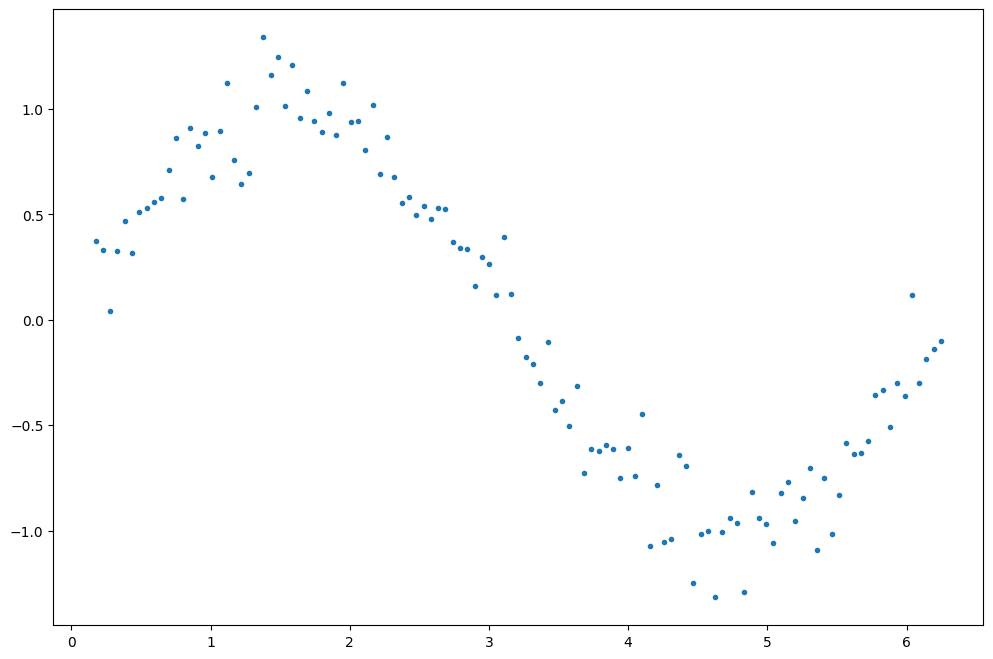

In [ ]:
#Plotting the dependent and independent variables
plt.figure(figsize=(12,8))
plt.plot(data['x'],data['y'],'.')

In [ ]:
# polynomial regression with powers of x from 1 to 15
for i in range(2,16):  #power of 1 is already there, hence starting with 2
    colname = 'x_%d'%i      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.17,0.37,0.03,0.0053,0.00093,0.00016,2.8e-05,4.9e-06,8.6e-07,1.5e-07,2.6e-08,4.6e-09,8e-10,1.4e-10,2.4e-11,4.2e-12
1,0.23,0.33,0.051,0.012,0.0027,0.0006,0.00014,3.1e-05,7e-06,1.6e-06,3.6e-07,8.2e-08,1.9e-08,4.2e-09,9.6e-10,2.2e-10
2,0.28,0.044,0.078,0.022,0.0061,0.0017,0.00047,0.00013,3.7e-05,1e-05,2.9e-06,8.1e-07,2.2e-07,6.3e-08,1.8e-08,4.9e-09
3,0.33,0.32,0.11,0.036,0.012,0.004,0.0013,0.00044,0.00015,4.8e-05,1.6e-05,5.3e-06,1.8e-06,5.9e-07,1.9e-07,6.4e-08
4,0.38,0.47,0.15,0.057,0.022,0.0083,0.0032,0.0012,0.00047,0.00018,7e-05,2.7e-05,1e-05,3.9e-06,1.5e-06,5.8e-07


Creating test and train

In [ ]:
data['randNumCol'] = np.random.randint(1, 6, data.shape[0])
train=data[data['randNumCol']<=3]
test=data[data['randNumCol']>3]
train = train.drop('randNumCol', axis=1)
test = test.drop('randNumCol', axis=1)

## Linear Regression

In [ ]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

In [ ]:
#Separating the independent and dependent variables
X_train = train.drop('y', axis=1).values
y_train = train['y'].values
X_test = test.drop('y', axis=1).values
y_test = test['y'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Training Error 0.2131443095817389
Testing Error 0.18974033118165395


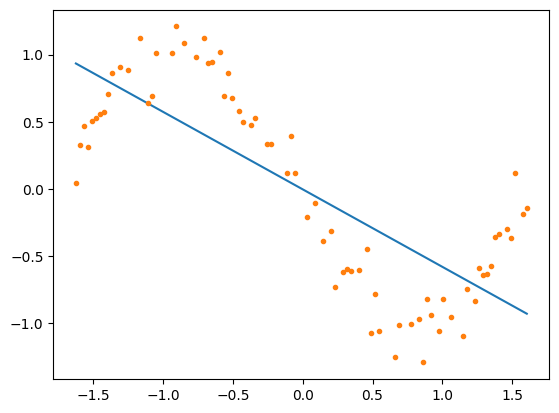

In [ ]:
#Linear regression with one features
independent_variable_train = X_train[:,0:1]
X_train_scaled = scaler.fit_transform(independent_variable_train)
linreg = LinearRegression()

linreg.fit(X_train_scaled,y_train)
y_train_pred = linreg.predict(X_train_scaled)

rss_train = sum((y_train_pred-y_train)**2) / X_train_scaled.shape[0]

independent_variable_test = X_test[:,0:1]
X_test_scaled = scaler.transform(independent_variable_test)
y_test_pred = linreg.predict(X_test_scaled)
rss_test = sum((y_test_pred-y_test)**2)/ X_test_scaled.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train_scaled,y_train_pred)
plt.plot(X_train_scaled,y_train,'.')

Training Error 0.02147248177096571
Testing Error 0.030451878881969232


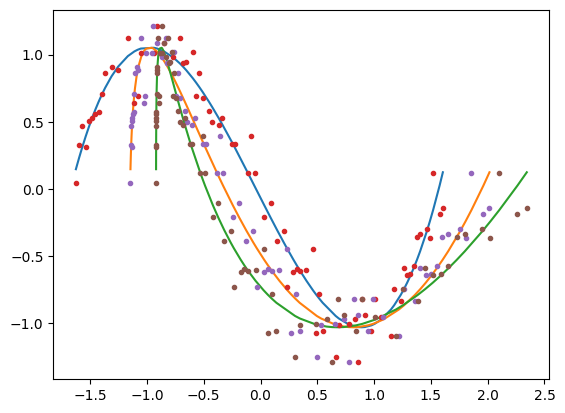

In [ ]:
#Linear regression with three features
independent_variable_train = X_train[:,0:3]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(independent_variable_train)

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_train_pred = linreg.predict(X_train_scaled)

rss_train = sum((y_train_pred-y_train)**2) / X_train_scaled.shape[0]

independent_variable_test = X_test[:,0:3]
X_test_scaled = scaler.transform(independent_variable_test)
y_test_pred = linreg.predict(X_test_scaled)
rss_test = sum((y_test_pred-y_test)**2)/ X_test_scaled.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train_scaled,y_train_pred)
plt.plot(X_train_scaled,y_train,'.')

Training Error 0.018764347745704197
Testing Error 0.032176445721772924


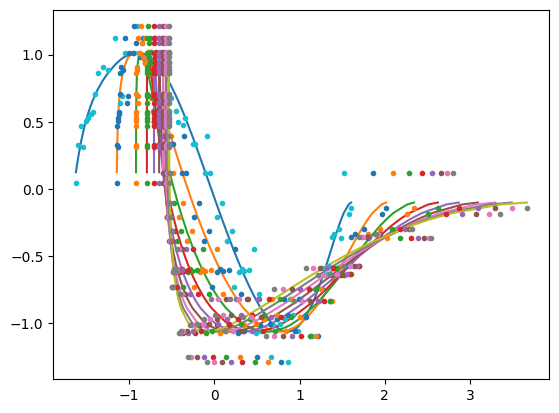

In [ ]:
#Linear regression with Seven features
independent_variable_train = X_train[:,0:9]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(independent_variable_train)

linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_train_pred = linreg.predict(X_train_scaled)

rss_train = sum((y_train_pred-y_train)**2) / X_train_scaled.shape[0]

independent_variable_test = X_test[:,0:9]
X_test_scaled = scaler.transform(independent_variable_test)
y_test_pred = linreg.predict(X_test_scaled)
rss_test = sum((y_test_pred-y_test)**2)/ X_test_scaled.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(X_train_scaled,y_train_pred)
plt.plot(X_train_scaled,y_train,'.')

In [ ]:
# defining a function which will fit linear regression model, plot the results, and return the coefficients
def linear_regression(train_x, train_y, test_x, test_y, features, models_to_plot):

    #Loading the scaler
    scaler = StandardScaler()

    #Fit the model
    linreg = LinearRegression()
    train_x_scaled = scaler.fit_transform(train_x)
    test_x_scaled = scaler.transform(test_x)
    linreg.fit(train_x_scaled,train_y)
    train_y_pred = linreg.predict(train_x_scaled)
    test_y_pred = linreg.predict(test_x_scaled)

    #Check if a plot is to be made for the entered features
    if features in models_to_plot:
        plt.subplot(models_to_plot[features])
        plt.tight_layout()
        plt.plot(train_x_scaled[:,0:1],train_y_pred)

        plt.plot(train_x_scaled[:,0:1],train_y,'.')

        plt.title('Number of Predictors: %d'%features)

    #Return the result in pre-defined format
    rss_train = sum((train_y_pred-train_y)**2)/train_x_scaled.shape[0]
    ret = [rss_train]

    rss_test = sum((test_y_pred-test_y)**2)/test_x_scaled.shape[0]
    ret.extend([rss_test])

    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)

    return ret

In [ ]:
#Initialize a dataframe to store the results:
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['Number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

In [ ]:
#Define the number of features for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

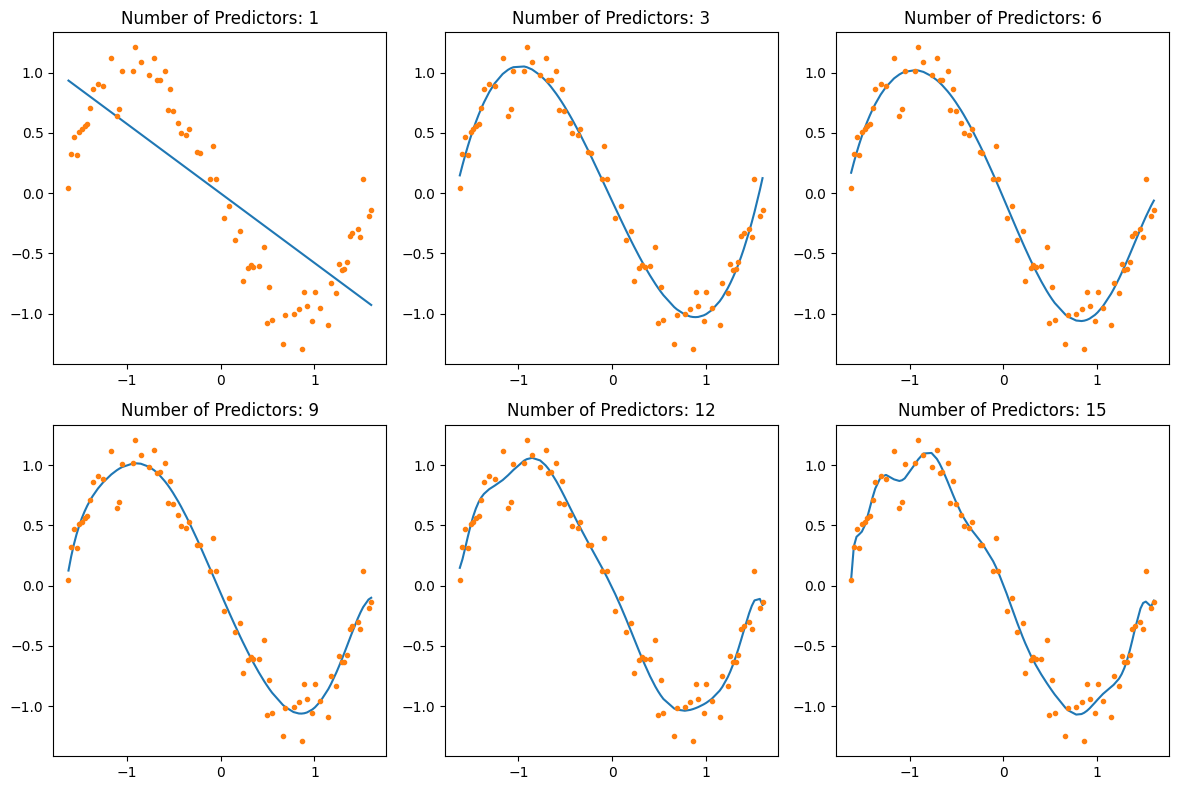

In [ ]:
#Iterate through all powers and store the results in a matrix form
plt.figure(figsize=(12,8))
for i in range(1,16):
    train_x = X_train[:,0:i]
    train_y = y_train
    test_x = X_test[:,0:i]
    test_y = y_test

    coef_matrix_simple.iloc[i-1,0:i+3] = linear_regression(train_x,train_y, test_x, test_y, features=i, models_to_plot=models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
Number_of_variable_1,0.21,0.19,-0.003,-0.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_2,0.21,0.19,-0.003,-0.72,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_3,0.021,0.03,-0.003,4,-12,7.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_4,0.021,0.03,-0.003,4.2,-13,8.5,-0.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_5,0.02,0.023,-0.003,2.2,0.1,-21,30,-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_6,0.019,0.028,-0.003,4.5,-20,48,-85,80,-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_7,0.019,0.028,-0.003,4.3,-18,39,-64,53,-10,-4.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_8,0.019,0.032,-0.003,9.3,-85,4.4e+02,-1.3e+03,2.4e+03,-2.4e+03,1.3e+03,-3.1e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_9,0.019,0.032,-0.003,10,-1e+02,5.6e+02,-1.8e+03,3.6e+03,-4.2e+03,2.9e+03,-1.1e+03,1.6e+02,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_variable_10,0.018,0.044,-0.003,30,-4.6e+02,3.6e+03,-1.7e+04,4.8e+04,-9e+04,1.1e+05,-8.1e+04,3.4e+04,-6.3e+03,NaN,NaN,NaN,NaN,NaN


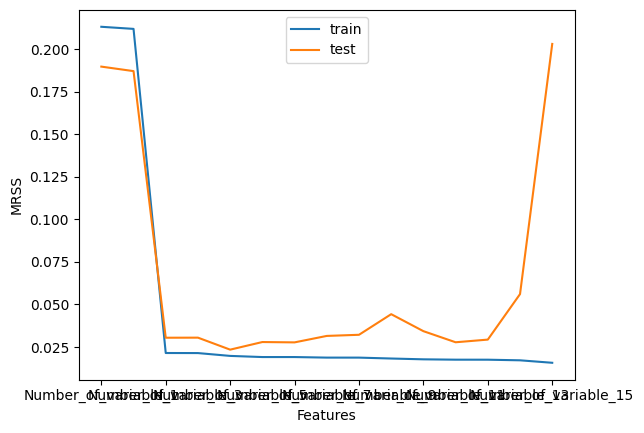

In [ ]:
coef_matrix_simple[['mrss_train','mrss_test']].plot()
plt.xlabel('Features')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

## Ridge

<img src="ridge.png">

In [ ]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge

In [ ]:
#Set the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

In [ ]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    scaler = StandardScaler()
    train_x_scaled = scaler.fit_transform(train_x)
    test_x_scaled = scaler.transform(test_x)
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(train_x_scaled,train_y)
    train_y_pred = ridgereg.predict(train_x_scaled)
    test_y_pred = ridgereg.predict(test_x_scaled)

    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x_scaled[:,0:1],train_y_pred)
        plt.plot(train_x_scaled[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)

    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x_scaled.shape[0]
    ret = [mrss_train]

    mrss_test = sum((test_y_pred-test_y)**2)/test_x_scaled.shape[0]
    ret.extend([mrss_test])

    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)

    return ret

In [ ]:
#Initialize the dataframe for storing coefficients.
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [ ]:
#Define the alpha value for which a plot is required:
models_to_plot = {0:231, 1e-4:232, 1e-3:233, 1e-2:234, 1:235, 5:236}

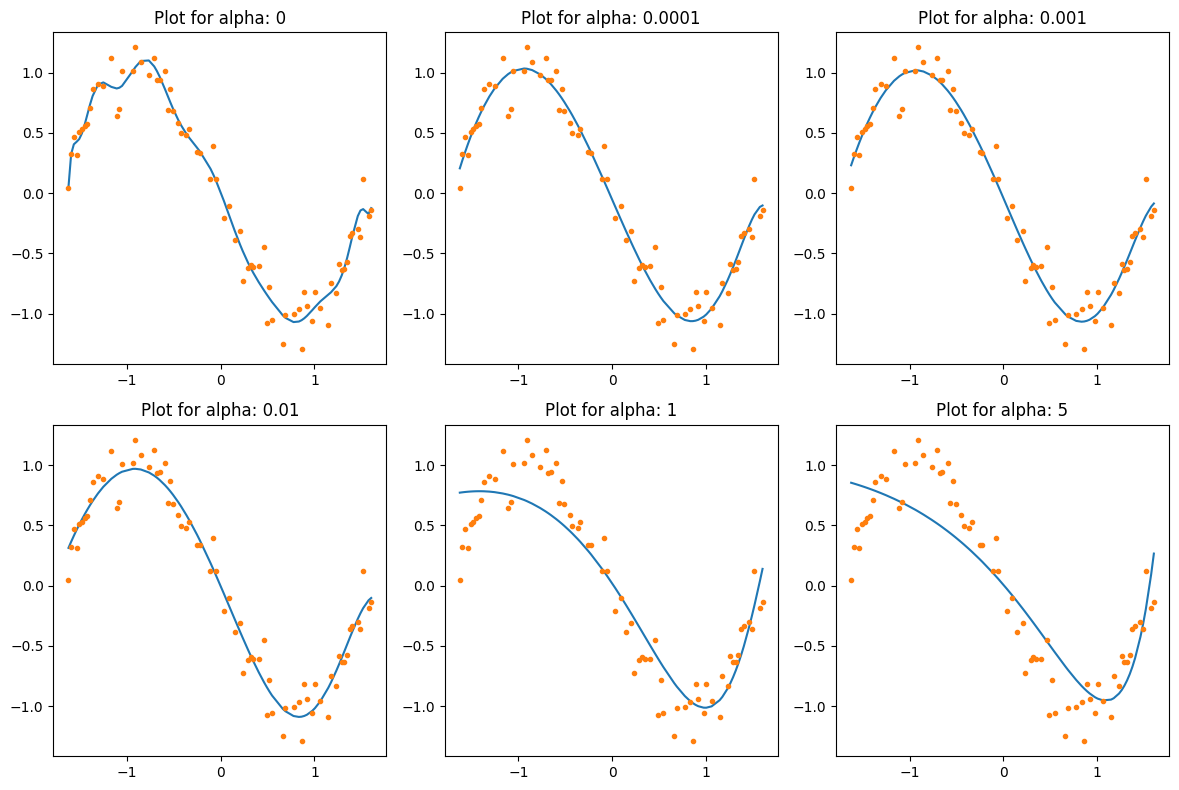

In [ ]:
#Iterate over the 10 alpha values:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(train_x, train_y, test_x, test_y, alpha_ridge[i], models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.016,0.2,-0.003,5e+02,-1.5e+04,2.4e+05,-2.3e+06,1.5e+07,-6.8e+07,2.2e+08,-5.4e+08,9.6e+08,-1.3e+09,1.2e+09,-8e+08,3.6e+08,-9.8e+07,1.2e+07
alpha_1e-08,0.019,0.029,-0.003,5.2,-30,1e+02,-2.5e+02,3e+02,-47,-2.3e+02,25,2.3e+02,97,-1.8e+02,-2.3e+02,49,3.4e+02,-1.8e+02
alpha_0.0001,0.019,0.026,-0.003,3.1,-7,-0.18,1.8,2.2,1.4,0.066,-1.1,-1.5,-0.98,0.12,1.3,1.8,0.85,-2.3
alpha_0.001,0.019,0.025,-0.003,2.8,-6,-0.92,1.8,1.9,1.1,0.16,-0.41,-0.56,-0.38,-0.052,0.25,0.37,0.14,-0.54
alpha_0.01,0.02,0.026,-0.003,2.2,-4.1,-1.7,0.52,1.4,1.3,0.89,0.37,-0.056,-0.33,-0.44,-0.41,-0.26,-0.035,0.24
alpha_1,0.067,0.065,-0.003,0.18,-0.78,-0.68,-0.33,-0.022,0.19,0.3,0.33,0.32,0.26,0.18,0.078,-0.031,-0.15,-0.26
alpha_5,0.1,0.098,-0.003,-0.19,-0.39,-0.31,-0.18,-0.06,0.026,0.08,0.11,0.12,0.12,0.1,0.083,0.058,0.029,-0.00078
alpha_10,0.11,0.11,-0.003,-0.24,-0.31,-0.24,-0.15,-0.065,-0.0046,0.037,0.064,0.078,0.084,0.084,0.079,0.07,0.06,0.047
alpha_20,0.13,0.12,-0.003,-0.24,-0.25,-0.19,-0.12,-0.066,-0.021,0.012,0.036,0.051,0.062,0.068,0.07,0.071,0.069,0.066
alpha_25,0.13,0.13,-0.003,-0.23,-0.23,-0.18,-0.12,-0.065,-0.024,0.0067,0.029,0.045,0.055,0.062,0.066,0.068,0.068,0.067


In [ ]:
coef_matrix_ridge['mrss_train']

alpha_0        0.016
alpha_1e-08    0.019
alpha_0.0001   0.019
alpha_0.001    0.019
alpha_0.01      0.02
alpha_1        0.067
alpha_5          0.1
alpha_10        0.11
alpha_20        0.13
alpha_25        0.13
Name: mrss_train, dtype: object

In [ ]:
coef_matrix_ridge['mrss_test'].shape

(10,)

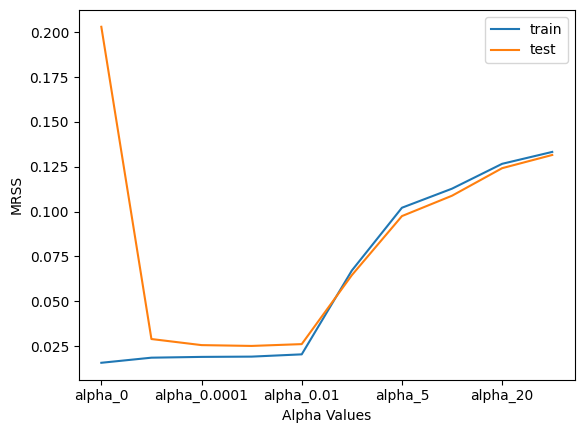

In [ ]:
coef_matrix_ridge[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

In [ ]:
alpha_ridge

[0, 1e-08, 0.0001, 0.001, 0.01, 1, 5, 10, 20, 25]

In [ ]:
#Printing number of zeros in each row of the coefficients dataset
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_0         0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
alpha_25        0
dtype: int64

## Lasso

<img src="Lasso.png">

In [ ]:
#Importing Lasso model from sklearn's linear_model module
from sklearn.linear_model import Lasso

In [ ]:
#Define the alpha values to test
alpha_lasso = [0, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [ ]:
# defining a function which will fit lasso regression model, plot the results, and return the coefficients
def lasso_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Load the scaler
    scaler = StandardScaler()

    #Fit the model
    if alpha == 0:
        lassoreg = LinearRegression()
        train_x_scaled = scaler.fit_transform(train_x)
        test_x_scaled = scaler.fit_transform(test_x)
        lassoreg.fit(train_x_scaled, train_y)
        train_y_pred = lassoreg.predict(train_x_scaled)
        test_y_pred = lassoreg.predict(test_x_scaled)

    else:
        lassoreg = Lasso(alpha=alpha)
        train_x_scaled = scaler.fit_transform(train_x)
        test_x_scaled = scaler.fit_transform(test_x)
        lassoreg.fit(train_x_scaled, train_y)
        train_y_pred = lassoreg.predict(train_x_scaled)
        test_y_pred = lassoreg.predict(test_x_scaled)

    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x_scaled[:,0:1],train_y_pred)
        plt.plot(train_x_scaled[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)

    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x_scaled.shape[0]
    ret = [mrss_train]

    mrss_test = sum((test_y_pred-test_y)**2)/test_x_scaled.shape[0]
    ret.extend([mrss_test])

    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)

    return ret

In [ ]:
#Initialize the dataframe to store coefficients
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [ ]:
#Define the models to plot
models_to_plot = {0:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.336e-01, tolerance: 3.983e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.335e-01, tolerance: 3.983e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.065e-01, tolerance: 3.983e

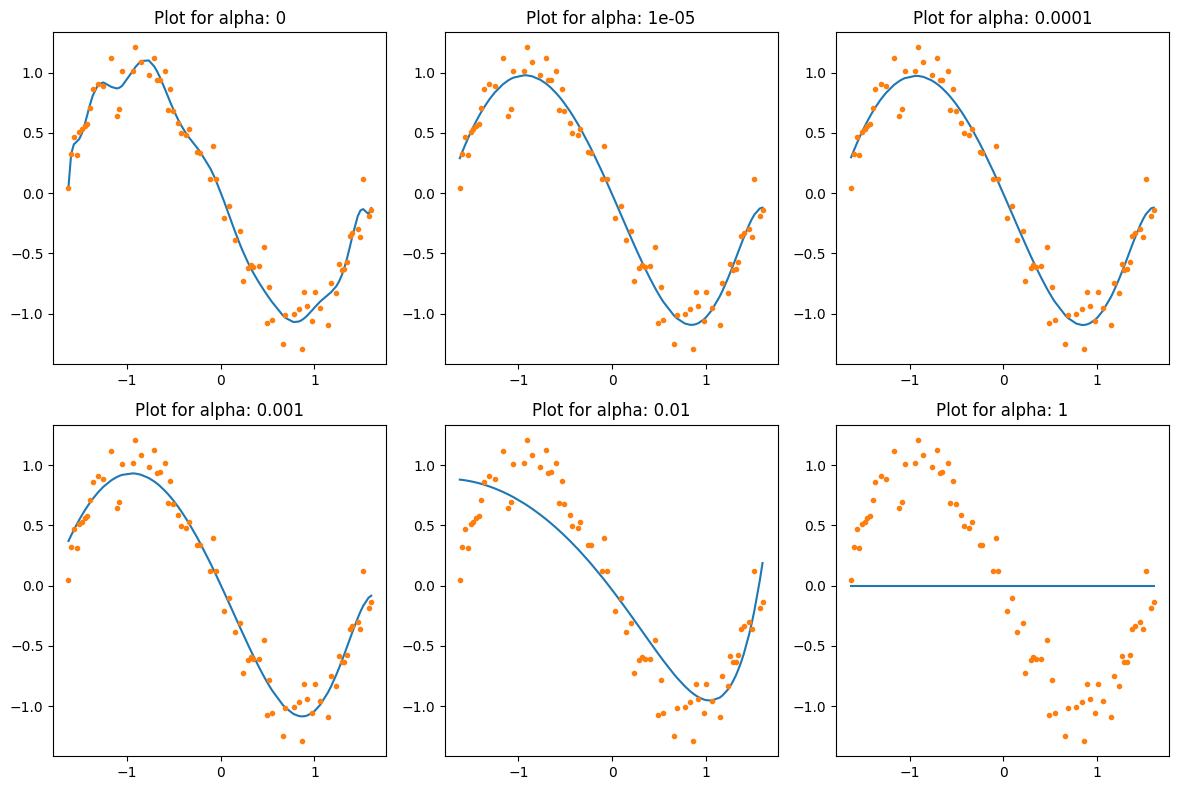

In [ ]:
#Iterate over the 10 alpha values:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(train_x, train_y, test_x, test_y, alpha_lasso[i], models_to_plot)

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.016,1.3,-0.003,5e+02,-1.5e+04,2.4e+05,-2.3e+06,1.5e+07,-6.8e+07,2.2e+08,-5.4e+08,9.6e+08,-1.3e+09,1.2e+09,-8e+08,3.6e+08,-9.8e+07,1.2e+07
alpha_1e-10,0.02,0.043,-0.003,2.5,-5.4,-0.26,0.97,0.98,0.72,0.45,0.24,0.092,-0.0077,-0.073,-0.12,-0.14,-0.16,-0.17
alpha_1e-08,0.02,0.043,-0.003,2.5,-5.4,-0.26,0.97,0.98,0.72,0.45,0.24,0.092,-0.0077,-0.073,-0.12,-0.14,-0.16,-0.17
alpha_1e-05,0.02,0.043,-0.003,2.5,-5.4,-0.26,0.96,0.99,0.72,0.45,0.24,0.09,-0.0066,-0.061,-0.12,-0.14,-0.16,-0.17
alpha_0.0001,0.02,0.043,-0.003,2.4,-5.3,-0.23,0.82,1,0.73,0.45,0.23,0.073,0,-0,-0.081,-0.16,-0.18,-0.19
alpha_0.001,0.022,0.041,-0.003,2.1,-4.6,-0,0,0.97,0.94,0.5,0.16,0,0,0,-0,-0,-0.015,-0.45
alpha_0.01,0.09,0.073,-0.003,0,-1,-0.048,-0,0,0,0,0.011,0.64,0,0,0,0,0,0
alpha_1,0.55,0.56,-0.003,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,0.55,0.56,-0.003,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,0.55,0.56,-0.003,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


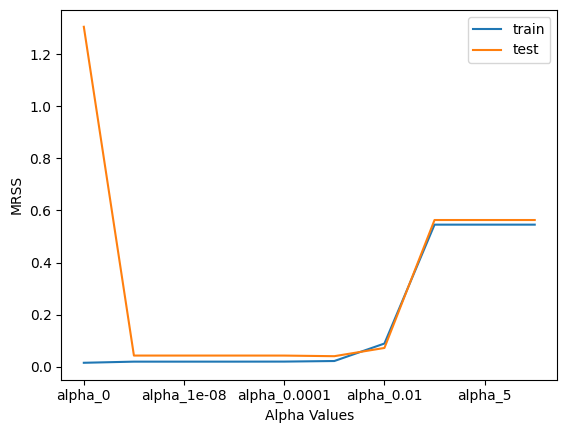

In [ ]:
coef_matrix_lasso[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])

In [ ]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_0          0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      0
alpha_0.0001     2
alpha_0.001      7
alpha_0.01      11
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64